In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data into a DataFrame
file_path = 'D:/week3 data/MachineLearningRating_v3.txt'
df = pd.read_csv(file_path, delimiter='|')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

C:\Users\Robel\AppData\Local\Temp\ipykernel_6140\3819030752.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


Missing values in each column:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        

In [2]:
# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df[['TotalPremium', 'TotalClaims']] = imputer.fit_transform(df[['TotalPremium', 'TotalClaims']])

# For categorical columns, we can impute with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Verify that there are no missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                      

In [4]:
# Example feature engineering
# Create a feature representing the age of the vehicle
df['VehicleAge'] = 2024 - df['RegistrationYear']

# Create interaction terms if necessary
df['PremiumPerClaim'] = df['TotalPremium'] / (df['TotalClaims'] + 1) 

In [5]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify the encoding
print("Data after encoding:\n", df.head())


Data after encoding:
    UnderwrittenCoverID  PolicyID  IsVATRegistered  PostalCode      mmcode  \
0               145249     12827             True        1459  44069150.0   
1               145249     12827             True        1459  44069150.0   
2               145249     12827             True        1459  44069150.0   
3               145255     12827             True        1459  44069150.0   
4               145255     12827             True        1459  44069150.0   

   RegistrationYear  Cylinders  cubiccapacity  kilowatts  NumberOfDoors  ...  \
0              2004        6.0         2597.0      130.0            4.0  ...   
1              2004        6.0         2597.0      130.0            4.0  ...   
2              2004        6.0         2597.0      130.0            4.0  ...   
3              2004        6.0         2597.0      130.0            4.0  ...   
4              2004        6.0         2597.0      130.0            4.0  ...   

   CoverGroup_Standalone passenger

In [6]:
from sklearn.model_selection import train_test_split

# Define the target variables and features
X = df.drop(['TotalPremium', 'TotalClaims'], axis=1)
y_premium = df['TotalPremium']
y_claims = df['TotalClaims']

# Split the data
X_train, X_test, y_train_premium, y_test_premium = train_test_split(X, y_premium, test_size=0.3, random_state=42)
X_train_claims, X_test_claims, y_train_claims, y_test_claims = train_test_split(X, y_claims, test_size=0.3, random_state=42)

# Verify the split
print("Training set size for TotalPremium:", X_train.shape[0])
print("Test set size for TotalPremium:", X_test.shape[0])
print("Training set size for TotalClaims:", X_train_claims.shape[0])
print("Test set size for TotalClaims:", X_test_claims.shape[0])

Training set size for TotalPremium: 700068
Test set size for TotalPremium: 300030
Training set size for TotalClaims: 700068
Test set size for TotalClaims: 300030


In [13]:
# Select a smaller subset of features
selected_features = ['cubiccapacity', 'kilowatts', 'CoverGroup_Third Party Only', 'VehicleAge']
X_train_sampled_small = X_train_sampled[selected_features]
X_test_small = X_test[selected_features]

In [15]:
from sklearn.impute import SimpleImputer

# Impute missing values for selected features
imputer = SimpleImputer(strategy='mean')
X_train_sampled_small_imputed = imputer.fit_transform(X_train_sampled_small)
X_test_small_imputed = imputer.transform(X_test_small)

# Verify that there are no more NaN values
print("Any NaN values in training set?", pd.DataFrame(X_train_sampled_small_imputed).isnull().sum().sum() > 0)
print("Any NaN values in test set?", pd.DataFrame(X_test_small_imputed).isnull().sum().sum() > 0)

Any NaN values in training set? False
Any NaN values in test set? False


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Linear Regression model
model_premium = LinearRegression()
model_premium.fit(X_train_sampled_small_imputed, y_train_premium_sampled)

# Predict on the test set
y_pred_premium = model_premium.predict(X_test_small_imputed)

# Evaluate the model
mse_premium = mean_squared_error(y_test_premium, y_pred_premium)
r2_premium = r2_score(y_test_premium, y_pred_premium)

print("Linear Regression - Mean Squared Error for TotalPremium:", mse_premium)
print("Linear Regression - R-squared for TotalPremium:", r2_premium)

Linear Regression - Mean Squared Error for TotalPremium: 52840.50429011844
Linear Regression - R-squared for TotalPremium: 0.003671971947100894


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
forest_premium = RandomForestRegressor(random_state=42)
forest_premium.fit(X_train_sampled_small_imputed, y_train_premium_sampled)

# Predict on the test set
y_pred_forest_premium = forest_premium.predict(X_test_small_imputed)

# Evaluate the model
mse_forest_premium = mean_squared_error(y_test_premium, y_pred_forest_premium)
r2_forest_premium = r2_score(y_test_premium, y_pred_forest_premium)

print("Random Forest - Mean Squared Error for TotalPremium:", mse_forest_premium)
print("Random Forest - R-squared for TotalPremium:", r2_forest_premium)

Random Forest - Mean Squared Error for TotalPremium: 52924.489260146576
Random Forest - R-squared for TotalPremium: 0.0020884030410437404


In [4]:
# Check unique values in the 'CoverGroup' column
print(df['CoverGroup'].unique())

['Comprehensive - Taxi' 'Credit Protection' 'Accidental Death'
 'Basic Excess Waiver' 'Income Protector' 'Deposit Cover'
 'Standalone passenger liability' 'Baggage/Luggage'
 'Asset Value Preserver' 'Cash Takings' 'Third Party Only' 'Trailer'
 'Fire,Theft and Third Party' 'Motor Comprehensive']


In [6]:
# Import Libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Path to the .txt file
file_path = 'D:/week3 data/MachineLearningRating_v3.txt'

# Load the data into a DataFrame with pipe delimiter
df = pd.read_csv(file_path, delimiter='|')

# Feature Engineering: Create a feature representing the age of the vehicle
df['VehicleAge'] = 2024 - df['RegistrationYear']

# Select relevant features
selected_features = ['cubiccapacity', 'kilowatts', 'VehicleAge']

# Prepare Training and Test Sets
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df[selected_features]
y_premium = df['TotalPremium']

# Split the data
X_train, X_test, y_train_premium, y_test_premium = train_test_split(X, y_premium, test_size=0.3, random_state=42)

# Sample a smaller subset to fit into memory
X_train_sampled = X_train.sample(n=10000, random_state=42)
y_train_premium_sampled = y_train_premium.loc[X_train_sampled.index]

# Impute Missing Values for Selected Features
imputer = SimpleImputer(strategy='mean')
X_train_sampled_small_imputed = imputer.fit_transform(X_train_sampled)
X_test_small_imputed = imputer.transform(X_test)

# Train the XGBoost Model
xgb_premium = xgb.XGBRegressor(random_state=42)
xgb_premium.fit(X_train_sampled_small_imputed, y_train_premium_sampled)

# Predict on the Test Set
y_pred_xgb_premium = xgb_premium.predict(X_test_small_imputed)

# Evaluate the Model
mse_xgb_premium = mean_squared_error(y_test_premium, y_pred_xgb_premium)
r2_xgb_premium = r2_score(y_test_premium, y_pred_xgb_premium)

# Print Evaluation Metrics
print("XGBoost - Mean Squared Error for TotalPremium:", mse_xgb_premium)
print("XGBoost - R-squared for TotalPremium:", r2_xgb_premium)

C:\Users\Robel\AppData\Local\Temp\ipykernel_1684\3664123240.py:11: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


XGBoost - Mean Squared Error for TotalPremium: 53060.82722134394
XGBoost - R-squared for TotalPremium: -0.00048230164570028933


In [4]:
# Import Libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Path to the .txt file
file_path = 'D:/week3 data/MachineLearningRating_v3.txt'

# Load the data into a DataFrame with pipe delimiter
df = pd.read_csv(file_path, delimiter='|')

# Feature Engineering: Create a feature representing the age of the vehicle
df['VehicleAge'] = 2024 - df['RegistrationYear']

# Select relevant features
selected_features = ['cubiccapacity', 'kilowatts', 'VehicleAge']

# Prepare Training and Test Sets
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df[selected_features]
y_premium = df['TotalPremium']

# Split the data
X_train, X_test, y_train_premium, y_test_premium = train_test_split(X, y_premium, test_size=0.3, random_state=42)

# Sample a smaller subset to fit into memory
X_train_sampled = X_train.sample(n=10000, random_state=42)
y_train_premium_sampled = y_train_premium.loc[X_train_sampled.index]

# Impute Missing Values for Selected Features
imputer = SimpleImputer(strategy='mean')
X_train_sampled_small_imputed = imputer.fit_transform(X_train_sampled)
X_test_small_imputed = imputer.transform(X_test)

# Train and Predict with Linear Regression Model
model_premium = LinearRegression()
model_premium.fit(X_train_sampled_small_imputed, y_train_premium_sampled)
y_pred_premium = model_premium.predict(X_test_small_imputed)
mse_premium = mean_squared_error(y_test_premium, y_pred_premium)
r2_premium = r2_score(y_test_premium, y_pred_premium)
mae_premium = mean_absolute_error(y_test_premium, y_pred_premium)
print("Linear Regression - Mean Squared Error for TotalPremium:", mse_premium)
print("Linear Regression - R-squared for TotalPremium:", r2_premium)
print("Linear Regression - Mean Absolute Error for TotalPremium:", mae_premium)

# Train and Predict with Random Forest Model
forest_premium = RandomForestRegressor(random_state=42)
forest_premium.fit(X_train_sampled_small_imputed, y_train_premium_sampled)
y_pred_forest_premium = forest_premium.predict(X_test_small_imputed)
mse_forest_premium = mean_squared_error(y_test_premium, y_pred_forest_premium)
r2_forest_premium = r2_score(y_test_premium, y_pred_forest_premium)
mae_forest_premium = mean_absolute_error(y_test_premium, y_pred_forest_premium)
print("Random Forest - Mean Squared Error for TotalPremium:", mse_forest_premium)
print("Random Forest - R-squared for TotalPremium:", r2_forest_premium)
print("Random Forest - Mean Absolute Error for TotalPremium:", mae_forest_premium)

# Train and Predict with XGBoost Model
xgb_premium = xgb.XGBRegressor(random_state=42)
xgb_premium.fit(X_train_sampled_small_imputed, y_train_premium_sampled)
y_pred_xgb_premium = xgb_premium.predict(X_test_small_imputed)
mse_xgb_premium = mean_squared_error(y_test_premium, y_pred_xgb_premium)
r2_xgb_premium = r2_score(y_test_premium, y_pred_xgb_premium)
mae_xgb_premium = mean_absolute_error(y_test_premium, y_pred_xgb_premium)
print("XGBoost - Mean Squared Error for TotalPremium:", mse_xgb_premium)
print("XGBoost - R-squared for TotalPremium:", r2_xgb_premium)
print("XGBoost - Mean Absolute Error for TotalPremium:", mae_xgb_premium)

C:\Users\Robel\AppData\Local\Temp\ipykernel_6140\2137476701.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


Linear Regression - Mean Squared Error for TotalPremium: 52840.50429011844
Linear Regression - R-squared for TotalPremium: 0.003671971947100894
Linear Regression - Mean Absolute Error for TotalPremium: 89.50769917508
Random Forest - Mean Squared Error for TotalPremium: 52921.549984132864
Random Forest - R-squared for TotalPremium: 0.0021438242205723546
Random Forest - Mean Absolute Error for TotalPremium: 89.45853592342844
XGBoost - Mean Squared Error for TotalPremium: 53060.82722134394
XGBoost - R-squared for TotalPremium: -0.00048230164570028933
XGBoost - Mean Absolute Error for TotalPremium: 89.39195801763736


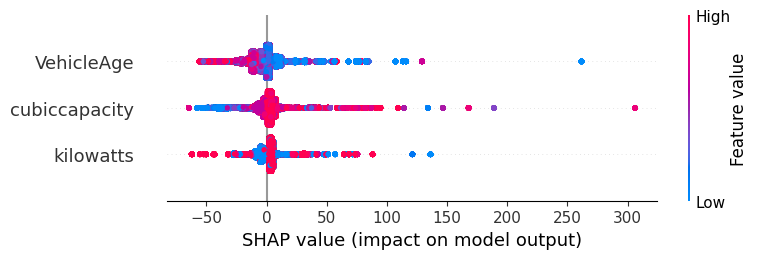

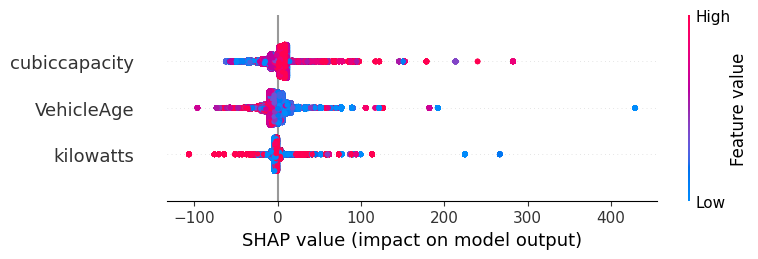

In [5]:
import shap

# SHAP values for Random Forest
explainer_rf = shap.TreeExplainer(forest_premium)
shap_values_rf = explainer_rf.shap_values(X_test_small_imputed)
shap.summary_plot(shap_values_rf, X_test_small_imputed, feature_names=selected_features)

# SHAP values for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_premium)
shap_values_xgb = explainer_xgb.shap_values(X_test_small_imputed)
shap.summary_plot(shap_values_xgb, X_test_small_imputed, feature_names=selected_features)